In [11]:
# pip install -U timesfm[torch]  # 先安装（PyTorch 版）
import numpy as np
import pandas as pd
import timesfm

# 可根据是否有 GPU 自动切换（可选）
try:
    import torch
    backend = "gpu" if torch.cuda.is_available() else "cpu"
except Exception:
    backend = "cpu"

# 初始化 TimesFM 2.0 (500M, PyTorch)
tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend=backend,               # "cpu" 或 "gpu"
        per_core_batch_size=32,
        horizon_len=100,
        num_layers=50,
        use_positional_embedding=False,
        context_len=2048,              # 2.0 版本最大 2048（需是 32 的倍数）
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"
    ),
)

# ---------- 用法 1：数组 API ----------
n = 150  

x = np.linspace(0, 20, n)

forecast_input = [
    x * np.sin(x),
]
# 频率指示：0=高频(到日), 1=中频(周/月), 2=低频(季/年)
frequency_input = [0]

point_forecast, experimental_quantile_forecast = tfm.forecast(
    forecast_input,
    freq=frequency_input,
)


Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 21161.98it/s]


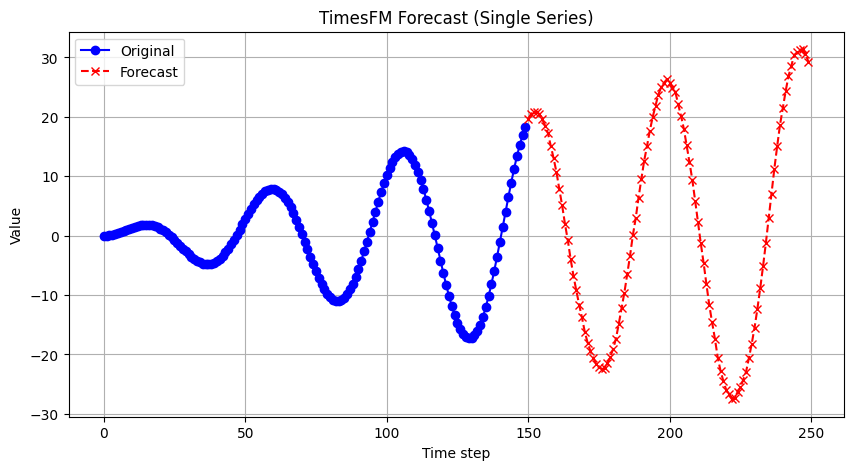

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 选择第一条时间序列
ts_input = forecast_input[0]
ts_forecast = point_forecast[0]

plt.figure(figsize=(10, 5))

# 原始序列
plt.plot(range(len(ts_input)), ts_input, color='blue', marker='o', linestyle='-', label='Original')

# 预测序列
forecast_range = range(len(ts_input), len(ts_input) + len(ts_forecast))
plt.plot(forecast_range, ts_forecast, color='red', marker='x', linestyle='--', label='Forecast')

plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('TimesFM Forecast (Single Series)')
plt.legend()
plt.grid(True)
plt.show()
